In [1]:
#Inverse transform method

from math import exp, log1p
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

randomExp = [-log1p(-rng())/2 for i in range(1000)]
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.hist(randomExp,density=True)
plt.show()

plt.scatter(randomExp[1:], randomExp[:-1])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

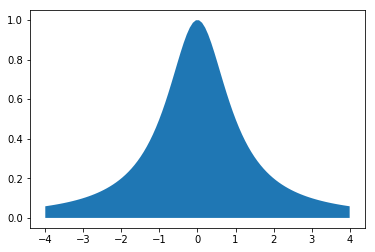

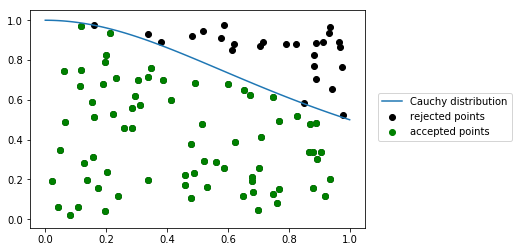

In [3]:
#Rejection sampling 
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, np.pi*dist.pdf(x)) 
plt.show()

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(100)]



mask=np.pi*dist.pdf(random[1:])>random[:-1]
X=[];Y=[]
for i in range(99):
    if(mask[i]==True):
        X.append(random[i+1])
        Y.append(random[i])

plt.scatter(random[1:], random[:-1],color='black')
plt.scatter(X, Y,color='green')

x = np.linspace(0, 1, 100)
plt.plot(x,np.pi*dist.pdf(x))
plt.legend(('Cauchy distribution','rejected points', 'accepted points'), loc=(1.04, 0.4))
plt.show()

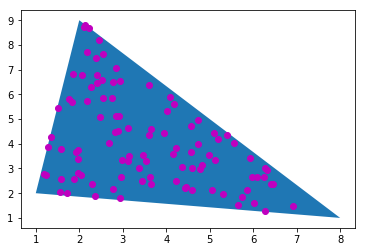

In [4]:
#Triangle
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from math import sqrt
n=100
a1=[1,2]
a2=[2,9]
a3=[8,1]
polygon = Polygon(1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))

u1,u2=np.random.rand(2, n)
x=[]
y=[]
for i in range(n):
    if u2[i]>u1[i]:
        x.append(u1[i]*a1[0]+(u2[i]-u1[i])*a2[0]+(1-u2[i])*a3[0])
        y.append(u1[i]*a1[1]+(u2[i]-u1[i])*a2[1]+(1-u2[i])*a3[1])
    else:
        x.append(u2[i]*a1[0]+(u1[i]-u2[i])*a2[0]+(1-u1[i])*a3[0])
        y.append(u2[i]*a1[1]+(u1[i]-u2[i])*a2[1]+(1-u1[i])*a3[1])
plt.scatter(x, y,color='m')
plt.show()

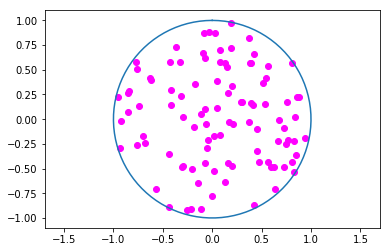

In [5]:
#Circle
from math import cos,sin,sqrt
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

n=100
R=np.random.rand(1,n)[0]
phi=2*np.pi*np.random.rand(1,n)[0]
x=[sqrt(R[i])*cos(phi[i]) for i in range(n)]
y=[sqrt(R[i])*sin(phi[i]) for i in range(n)]
plt.scatter(x, y,color='magenta')
plt.show()

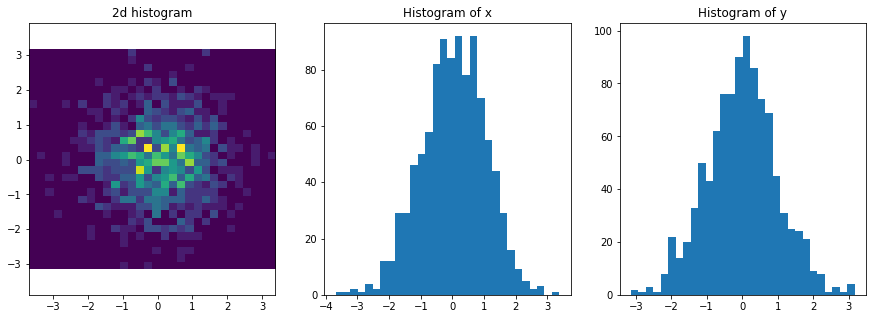

In [6]:
#Random normal generator
n = 1000
u1, u2 =-1+2*np.random.rand(2, n)
mask=(u1**2+u2**2)>1
while (np.any(mask)==True):
    u11, u22 =-1+2*np.random.rand(2, n)
    u1[mask]=u11[mask]
    u2[mask]=u22[mask]
    mask=(u1**2+u2**2)>1
    

s=u1**2+u2**2
r = np.sqrt(-2 * np.log(s)/s)
x=u1*r
y=u2*r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

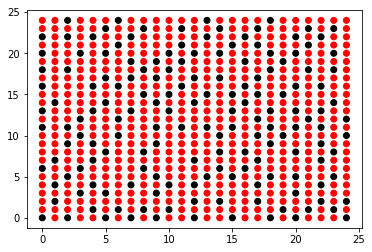

step 16384
E = 159.15869140625


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
def plot_grid(narr):
    colors = np.full_like(narr, 'red', dtype='U5')
    colors[narr==1] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

def check(narr,n):
    for i in range(n):
        for j in range(n):
            if narr[i][j]==1:
                if i>0:
                    if narr[i-1][j]==1:
                        narr[i][j]=0
                    elif j>0:
                        if narr[i][j-1]==1:
                            narr[i][j]=0   
                elif j>0:
                    if narr[i][j-1]==1:
                        narr[i][j]=0

def getConfiguration(narr,size,step,plotResult=False):
    for i in range(step):
        x=int(random.randint(0,size-1))
        y=int(random.randint(0,size-1))
        coin=int(random.randint(0,1))
        if coin==1:
            change=True
            if x+1<size:
                if narr[x+1][y]==1:
                    change=False
            if x>0 & change:
                if narr[x-1][y]==1:
                    change=False
            if y+1<size &change:
                if narr[x][y+1]==1:
                    change=False
            if y>0 & change:
                if narr[x][y-1]==1:
                    change=False
            if change==True:
                if narr[x][y]==0:
                    narr[x][y]=1
                
        else:
            if narr[x][y]==1:
                narr[x][y]=0
        
    return np.sum(narr)

from math import exp, gamma
import random
def dinvgamma(alpha, beta,x):
    if x<=0:
        return 0
    print(x)
    return float((beta**alpha)/gamma(alpha)*(x**(-alpha-1))*exp(-beta/x))

def MCMC(n,alpha, beta):
    state = np.random.choice([0], size=(size, size))
    step=10
    sumCom=np.sum(state)
    s=1
    for i in range(n):
        proposal=np.array(state)
        
        y=dinvgamma(alpha,beta,getConfiguration(proposal,size,step))
        x=dinvgamma(alpha,beta,getConfiguration(state,size,step))
        success=0
        if x==0:
            success=1
        else:
            success=y/x
        if 1<=success:
            state=proposal
            sumCom+=np.sum(state)
            s=s+1
    return sumCom/s

def neighbours(narr,x,y,size):
    counter=np.array([0,0])#?
    if(x.size==1):
        return list((counter, 0))
    if x<size-1:
        if narr[x+1][y]==1:
            counter[0]=1
        else:
            counter[1]=1
    if x>0 :
        if narr[x-1][y]==1:
            counter[0]+=1
        else:
            counter[1]+=1
    if y<size-1:
        if narr[x][y+1]==1:
            counter[0]+=1
        else:
            counter[1]+=1
    if y>0:
        if narr[x][y-1]==1:
            counter[0]+=1
        else:
            counter[1]+=1
    return list((counter, (counter[1]-counter[2])))

def getSpinConfiguration(size,beta,plotResult=False):
    top=np.ones(size*size).reshape(size,size)
    bottom=np.array(top)*(-1)
    m=1
    x=np.array([int(random.randint(0,size-1))])
    y=np.array([int(random.randint(0,size-1))])
    uniformRV=np.array([random.random()])
    while True:
        for i in range(2**(m-1)-1):
            expBottom=exp(2*beta*neighbours(bottom,x[i-1],y[i-1],size)[1])
            expTop=exp(2*beta*neighbours(top,x[i-1],y[i-1],size)[1])
            if(uniformRV[i-1]<expBottom/(expBottom+1)):
                bottom[x[i-1]][y[i-1]]=1
            else:
                bottom[x[i-1]][y[i-1]]=-1
            if(uniformRV[i-1]<expTop/(expTop+1)):
                top[x[i-1]][y[i-1]]=1
            else:
                top[x[i-1]][y[i-1]]=-1
        
        if(np.all(bottom==top)==True):
            break
        m=m+1
        x = np.array([int(random.randint(0,size-1)) for i in range(2**(m-1)-1)])
        y = np.array([int(random.randint(0,size-1)) for i in range(2**(m-1)-1)])
        uniformRV=[random.random() for i in range(2**(m-1))]
        top=np.ones(size*size).reshape(size,size)
        bottom=np.array(top)*(-1)

    return list((top,2**m))

size=25
beta=1
narr,step=getSpinConfiguration(size,beta)
narr[narr==-1]=0
check(narr,size)
plot_grid(narr)
n=int(1e4)
E=0
data=np.array([0 for i in range(step)])
for i in range(step):
    data[i]=getConfiguration(narr,size,10)
    E+=data[i]
E/=step
print("step "+str(step))
print("E = "+str(E))

C:\ProgramData\Anaconda3\envs\cs231n\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


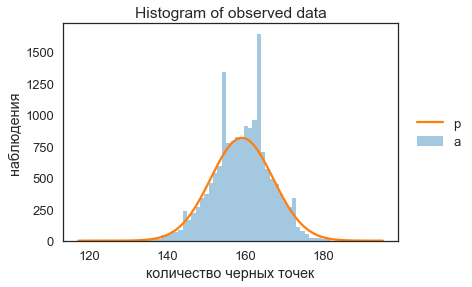

In [10]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')
ax=plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='количество закрашенных точек', ylabel='наблюдения');

def gauss(x,mu=0.,std=1.,step=1):
    const = step/((2*np.pi)**(1/2)*std)
    return [const*exp(-((x[i]-mu)**2)/(2*(std**2))) for i in range(x.size)]

k=(size**2)/8
x = np.linspace(k+k/2, size**2/4+k/2, 500)
plt.plot(x,gauss(x,E,8,step))
         
plt.legend(('распределение черных точек'), loc=(1.04, 0.4))
plt.xlabel(u'количество черных точек')
plt.ylabel(u'наблюдения')
plt.show()